<a href="https://colab.research.google.com/github/aryanshukla25/CNN_Binary_Classification/blob/main/03_CNN_Binary_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#INtroduction to CNN With Tensorflow


In [3]:
import datetime
print(f"Note book last run (end-to-end): {datetime.datetime.now()}")

Note book last run (end-to-end): 2024-06-22 18:01:36.193276


In [4]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2024-06-22 18:01:36--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.20.207, 108.177.98.207, 74.125.197.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.20.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   179MB/s    in 0.6s    

2024-06-22 18:01:36 (179 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [5]:
!ls piszza_steak


ls: cannot access 'piszza_steak': No such file or directory


In [6]:
!ls pizza_steak

test  train


In [7]:
!ls pizza_steak/train

pizza  steak


In [8]:
!ls pizza_steak/train/pizza


1008104.jpg  1572608.jpg  2097315.jpg  2572958.jpg  3084957.jpg  3693710.jpg  668944.jpg
1008144.jpg  1573562.jpg  2098014.jpg  2574896.jpg  3102271.jpg  3699992.jpg  670201.jpg
1008844.jpg  1576248.jpg  2104569.jpg  2576168.jpg  3105724.jpg  3702863.jpg  674188.jpg
1008941.jpg  1577871.jpg  2110257.jpg  2577373.jpg  3109486.jpg  3703769.jpg  676432.jpg
1011404.jpg  1584379.jpg  2112757.jpg  2577377.jpg  312479.jpg	 3704879.jpg  682201.jpg
102037.jpg   1593665.jpg  2121603.jpg  2581276.jpg  3128495.jpg  3705479.jpg  68684.jpg
1026922.jpg  1593835.jpg  2126352.jpg  2584745.jpg  3148119.jpg  370643.jpg   698251.jpg
1029698.jpg  1600705.jpg  2126709.jpg  2587918.jpg  3164761.jpg  3712344.jpg  702165.jpg
1033251.jpg  1608000.jpg  2135635.jpg  2587921.jpg  3168266.jpg  3713343.jpg  704161.jpg
1035854.jpg  1617418.jpg  2137341.jpg  259449.jpg   3170114.jpg  372275.jpg   709273.jpg
1038357.jpg  1620560.jpg  2142812.jpg  2602611.jpg  3173779.jpg  3742272.jpg  709947.jpg
1040878.jpg  1620761.jp

In [9]:
import os
for dirpath,dirnames,filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.


In [10]:
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))
num_steak_images_train

750

In [11]:
# Get the class names (programmatically, this is much more helpful with a longer list of classes)
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train/") # turn our training path into a Python path
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) # created a list of class_names from the subdirectories
print(class_names)

['pizza' 'steak']


In [12]:
# View an image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

Image shape: (384, 512, 3)


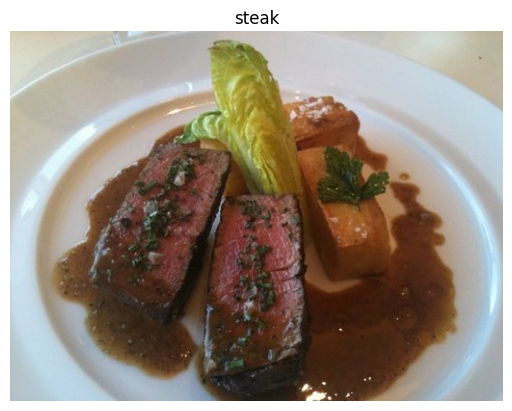

In [13]:
# View a random image from the training dataset
img = view_random_image(target_dir="pizza_steak/train/",
                        target_class="steak")

array([[[211, 206, 174],
        [211, 206, 174],
        [210, 205, 173],
        ...,
        [179, 174, 145],
        [179, 174, 144],
        [180, 175, 145]],

       [[212, 207, 175],
        [212, 207, 175],
        [212, 207, 175],
        ...,
        [181, 176, 147],
        [181, 176, 146],
        [182, 177, 147]],

       [[213, 208, 178],
        [213, 208, 178],
        [214, 209, 179],
        ...,
        [184, 179, 150],
        [183, 178, 148],
        [184, 179, 149]],

       ...,

       [[178, 191, 199],
        [179, 192, 200],
        [180, 193, 201],
        ...,
        [179, 189, 201],
        [180, 188, 201],
        [178, 186, 199]],

       [[176, 189, 197],
        [176, 189, 197],
        [177, 190, 198],
        ...,
        [179, 189, 199],
        [179, 187, 200],
        [176, 184, 197]],

       [[173, 186, 194],
        [174, 187, 195],
        [175, 188, 196],
        ...,
        [179, 189, 199],
        [178, 186, 199],
        [175, 183, 196]]], dtype=uint8)
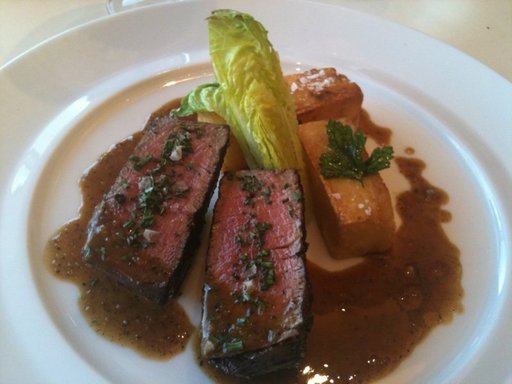

In [14]:
# View the img (actually just a big array/tensor)
img

In [15]:
# View the image shape
img.shape # returns (width, height, colour channels)

(384, 512, 3)

In [16]:
# Get all the pixel values between 0 & 1
img/255.

array([[[0.82745098, 0.80784314, 0.68235294],
        [0.82745098, 0.80784314, 0.68235294],
        [0.82352941, 0.80392157, 0.67843137],
        ...,
        [0.70196078, 0.68235294, 0.56862745],
        [0.70196078, 0.68235294, 0.56470588],
        [0.70588235, 0.68627451, 0.56862745]],

       [[0.83137255, 0.81176471, 0.68627451],
        [0.83137255, 0.81176471, 0.68627451],
        [0.83137255, 0.81176471, 0.68627451],
        ...,
        [0.70980392, 0.69019608, 0.57647059],
        [0.70980392, 0.69019608, 0.57254902],
        [0.71372549, 0.69411765, 0.57647059]],

       [[0.83529412, 0.81568627, 0.69803922],
        [0.83529412, 0.81568627, 0.69803922],
        [0.83921569, 0.81960784, 0.70196078],
        ...,
        [0.72156863, 0.70196078, 0.58823529],
        [0.71764706, 0.69803922, 0.58039216],
        [0.72156863, 0.70196078, 0.58431373]],

       ...,

       [[0.69803922, 0.74901961, 0.78039216],
        [0.70196078, 0.75294118, 0.78431373],
        [0.70588235, 0

In [17]:
#An end to end example
# Load our images
# Preprocess our images
# Build a CNN to find patterns in our images
# Compile our CNN
# Fit the CNN to our training dataṁ
# Evaluate our CNN on the test data
# Make predictions with our trained model

In [18]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#setseed
tf.random.set_seed(42)

# Preprocess data (get all of the pixel values between 1 and 0 Scaling/Normalization)
train_datagen = ImageDataGenerator(rescale = 1./255)
valid_datagen = ImageDataGenerator(rescale = 1./255)


# Setup the train and test directories
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test"

train_data= train_datagen.flow_from_directory(train_dir,
                                              target_size = (224,224),
                                              class_mode = "binary",
                                              batch_size = 32)
valid_data = valid_datagen.flow_from_directory(test_dir,
                                              target_size = (224,224),
                                              class_mode = "binary",
                                              batch_size = 32)
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters = 10,
                           kernel_size = 3,
                           activation = "relu",
                           input_shape = (224,224,3)),
    tf.keras.layers.Conv2D(10,3,activation = "relu"),
    tf.keras.layers.MaxPool2D(pool_size = 2,
                              padding = "valid"),
    tf.keras.layers.Conv2D(10,3,activation = "relu"),
    tf.keras.layers.Conv2D(10,3,activation = "relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation = "sigmoid")
])

model_1.compile(loss = "binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])
history_1 = model_1.fit(train_data,
                        epochs = 5,
                        steps_per_epoch = len(train_data),
                        validation_data = valid_data,
                        validation_steps = len(valid_data))




Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 101s 2s/step - loss: 0.6039 - accuracy: 0.6660 - val_loss: 0.4206 - val_accuracy: 0.8160
Epoch 2/5
47/47 [==============================] - 96s 2s/step - loss: 0.4562 - accuracy: 0.7967 - val_loss: 0.3926 - val_accuracy: 0.8260
Epoch 3/5
47/47 [==============================] - 97s 2s/step - loss: 0.4271 - accuracy: 0.8133 - val_loss: 0.3773 - val_accuracy: 0.8320
Epoch 4/5
47/47 [==============================] - 97s 2s/step - loss: 0.3826 - accuracy: 0.8327 - val_loss: 0.3911 - val_accuracy: 0.8180
Epoch 5/5
47/47 [==============================] - 97s 2s/step - loss: 0.3504 - accuracy: 0.8547 - val_loss: 0.3325 - val_accuracy: 0.8560


Image shape: (512, 511, 3)
Image shape: (384, 512, 3)


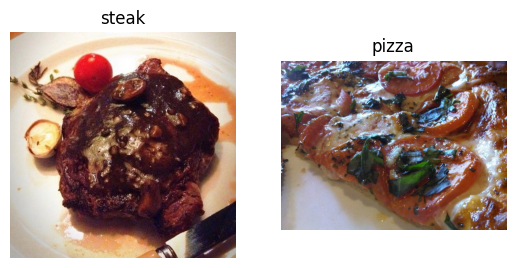

In [19]:
# Visualize data (requires function 'view_random_image' above)
plt.figure()
plt.subplot(1, 2, 1)
steak_img = view_random_image("pizza_steak/train/", "steak")
plt.subplot(1, 2, 2)
pizza_img = view_random_image("pizza_steak/train/", "pizza")

In [20]:
# Define training and test directory paths
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

In [21]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [22]:
# Turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               target_size=(224, 224),
                                               class_mode='binary',
                                               batch_size=32)

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=(224, 224),
                                             class_mode='binary',
                                             batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [23]:
# Get a sample of the training data batch
images, labels = train_data.next() # get the 'next' batch of images/labels
len(images), len(labels)

(32, 32)

In [24]:
# Get the first two images
images[:2], images[0].shape

(array([[[[0.9568628 , 0.8235295 , 0.57254905],
          [0.9176471 , 0.7843138 , 0.53333336],
          [0.92549026, 0.79215693, 0.54509807],
          ...,
          [0.9725491 , 0.882353  , 0.7176471 ],
          [0.9960785 , 0.9058824 , 0.74509805],
          [0.98823535, 0.8980393 , 0.7372549 ]],
 
         [[0.89019614, 0.7568628 , 0.50980395],
          [0.909804  , 0.77647066, 0.5294118 ],
          [0.9215687 , 0.78823537, 0.5411765 ],
          ...,
          [0.96470594, 0.87843144, 0.7176471 ],
          [0.97647065, 0.8862746 , 0.7254902 ],
          [0.9686275 , 0.87843144, 0.7176471 ]],
 
         [[0.8980393 , 0.7568628 , 0.52156866],
          [0.9176471 , 0.77647066, 0.5411765 ],
          [0.909804  , 0.7686275 , 0.53333336],
          ...,
          [0.97647065, 0.89019614, 0.7294118 ],
          [0.96470594, 0.87843144, 0.7254902 ],
          [0.97647065, 0.882353  , 0.73333335]],
 
         ...,
 
         [[0.90196085, 0.7686275 , 0.4784314 ],
          [0.88235

In [25]:
# View the first batch of labels
labels

array([1., 1., 0., 1., 1., 1., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0., 1.,
       1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 1., 1., 0., 1.],
      dtype=float32)

In [26]:
# Make the creating of our model a little easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [27]:
# Create the model (this can be our baseline, a 3 layer Convolutional Neural Network)
model_4 = Sequential([
  Conv2D(filters=10,
         kernel_size=3,
         strides=1,
         padding='valid',
         activation='relu',
         input_shape=(224, 224, 3)), # input layer (specify input shape)
  Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  Flatten(),
  Dense(1, activation='sigmoid') # output layer (specify output shape)
])

In [28]:
model_4.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

In [29]:

# Check lengths of training and test data generators
len(train_data), len(test_data)

(47, 16)

In [ ]:
# Fit the model
history_4 = model_4.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
42/47 [=========================>....] - ETA: 11s - loss: 1.7808 - accuracy: 0.6530

In [ ]:
# Plot the training curves
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10, 7));